<a href="https://colab.research.google.com/github/ogwora/Core_IP_Wk4/blob/master/Moringa_Data_Science_Core_W4_IP_2021_Lawrence_Ondieki_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The French Autolib electric car-sharing service company

## Define the Question

#### Data Analytic Question

>
Is the mean of Blue Cars taken in the Weekdays equal to the mean of Utilib Cars taken in Weekdays?





## Reading Data

In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Datasets
autolib = pd.read_csv('autolib_daily_events_postal_code.csv')
autolib.head(10)

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
5,75001,1/6/2018,1437,5,weekend,187,185,6,6,7,8,38,35
6,75001,1/7/2018,1440,6,weekend,180,180,2,2,10,9,34,34
7,75001,1/8/2018,1438,0,weekday,84,83,3,3,10,10,14,15
8,75001,1/9/2018,1439,1,weekday,81,84,1,1,4,4,15,15
9,75001,1/10/2018,1440,2,weekday,88,85,5,5,11,11,23,22


## Checking the Data

In [31]:
#Number of records
autolib.shape
#print('This dataset has {}'.format(autolib.shape[0]), 'rows and {}'.format(autolib.shape[1]),'columns')

(16085, 13)

In [4]:
#Information on the dataset
autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


### Autolib data has 16,085 rows and 13 columns
There are no duplicates and no null values.

In [5]:
# check for duplicates

autolib.duplicated().any()

False

In [6]:
# Check for missing value
autolib.isnull().any()

# Data has no null values

Postal code               False
date                      False
n_daily_data_points       False
dayOfWeek                 False
day_type                  False
BlueCars_taken_sum        False
BlueCars_returned_sum     False
Utilib_taken_sum          False
Utilib_returned_sum       False
Utilib_14_taken_sum       False
Utilib_14_returned_sum    False
Slots_freed_sum           False
Slots_taken_sum           False
dtype: bool

In [7]:
# Standardization of the columns 
autolib.columns = autolib.columns.str.lower().str.replace(" ","_")
autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   postal_code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayofweek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   bluecars_taken_sum      16085 non-null  int64 
 6   bluecars_returned_sum   16085 non-null  int64 
 7   utilib_taken_sum        16085 non-null  int64 
 8   utilib_returned_sum     16085 non-null  int64 
 9   utilib_14_taken_sum     16085 non-null  int64 
 10  utilib_14_returned_sum  16085 non-null  int64 
 11  slots_freed_sum         16085 non-null  int64 
 12  slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


## Dataset Cleanup

#### Using a Box Plot to check for outliers. We will exclude outliers.

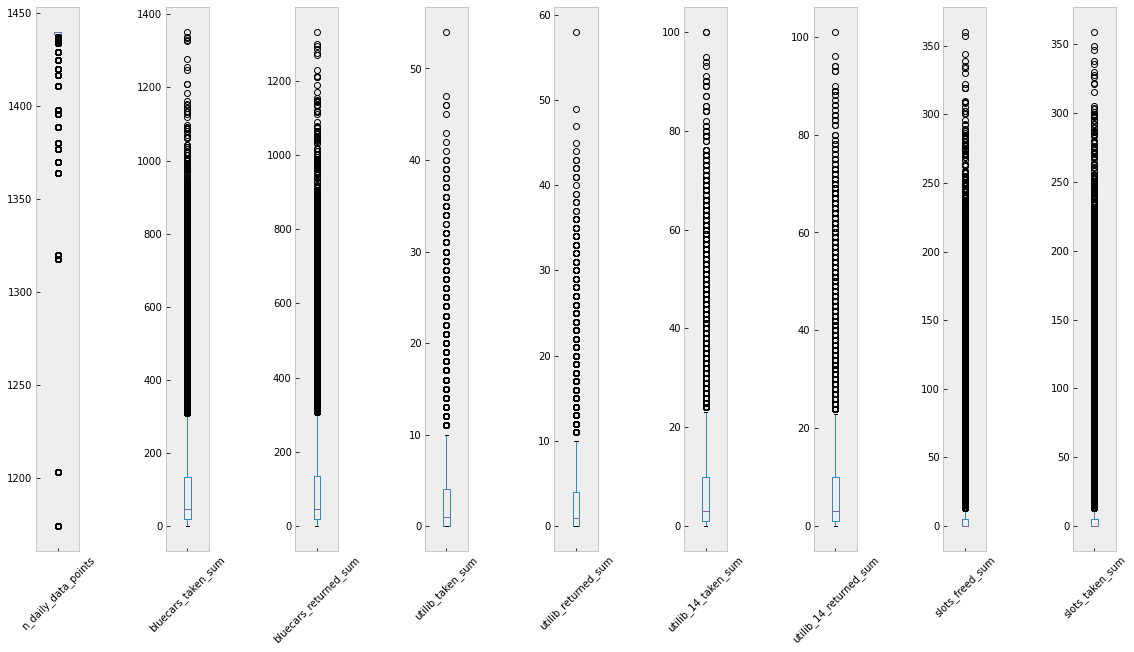

In [57]:
# Checking for Outliers
def autovisualiser(dataset_name, numeric_columns_list, width=15, height=10):
    
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = width
    fig_size[1] = height
    plt.rcParams["figure.figsize"] = fig_size
    plt.style.use('bmh')
    
    next_figure = 1
    for col in numeric_columns_list:
        plt.subplot(1, len(numeric_columns_list), next_figure)
        dataset_name.boxplot(col, rot = 45,grid=False)
        next_figure = next_figure + 1

    plt.subplots_adjust(left = 1, right= 2,hspace= 2, wspace=2)
    plt.show()
    
#we define our numeric columns list in our dataset then call the funtion for visual display
col_names = autolib.drop(['postal_code','date','day_type','dayofweek'],1)
autovisualiser(autolib, col_names.columns)

In [58]:
# Remove Outliers
# col_names = ['household_size', 'Respondent Age']
q3 = autolib.quantile(0.75)
q1 = autolib.quantile(0.25)

iqr = q3-q1

fin_outliers = autolib[~((autolib < (q1 - 1.5 * iqr)) |(autolib > (q3 + 1.5 * iqr))).any(axis=1)]
print(fin_outliers.shape)

(9783, 13)


In [10]:
# Save the cleaned dataset
fin_outliers.to_csv('./autolib_clean.csv')

## Univariate Analysis

### Categorical Variables

In [41]:
autolib_clean = pd.read_csv("autolib_clean.csv")

In [12]:
# Check for uniques values for categorical variables
categorical = ['day_type','date']

for i in categorical:
  print(autolib_clean[i].value_counts())

weekday    6820
weekend    2963
Name: day_type, dtype: int64
6/4/2018     78
5/3/2018     78
2/23/2018    78
5/20/2018    78
1/2/2018     78
             ..
1/14/2018    72
6/15/2018    72
3/31/2018    72
4/21/2018    72
4/14/2018    71
Name: date, Length: 130, dtype: int64


### Numerical Variables

In [13]:
# Description of the Numeric Variables
autolib_clean.describe( )

,Unnamed: 0,postal_code,n_daily_data_points,dayofweek,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
count,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000,9783.000000
mean,10109.123684,93104.755188,1439.698457,2.979454,49.242870,49.222324,1.498518,1.494327,3.567106,3.568231,0.697434,0.694981
std,3493.425725,1012.235885,0.564981,2.074932,46.303795,46.223838,1.909304,1.891761,3.895220,3.898348,1.833390,1.828739
min,3899.000000,91330.000000,1438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7090.500000,92270.000000,1440.000000,1.000000,17.000000,17.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,10166.000000,93110.000000,1440.000000,3.000000,34.000000,34.000000,1.000000,1.000000,2.000000,2.000000,0.000000,0.000000
75%,13149.500000,94100.000000,1440.000000,5.000000,67.000000,67.000000,2.000000,2.000000,5.000000,5.000000,0.000000,0.000000
max,16083.000000,95880.000000,1440.000000,6.000000,293.000000,301.000000,10.000000,10.000000,23.000000,23.000000,12.000000,12.000000


Frequency Distribution

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

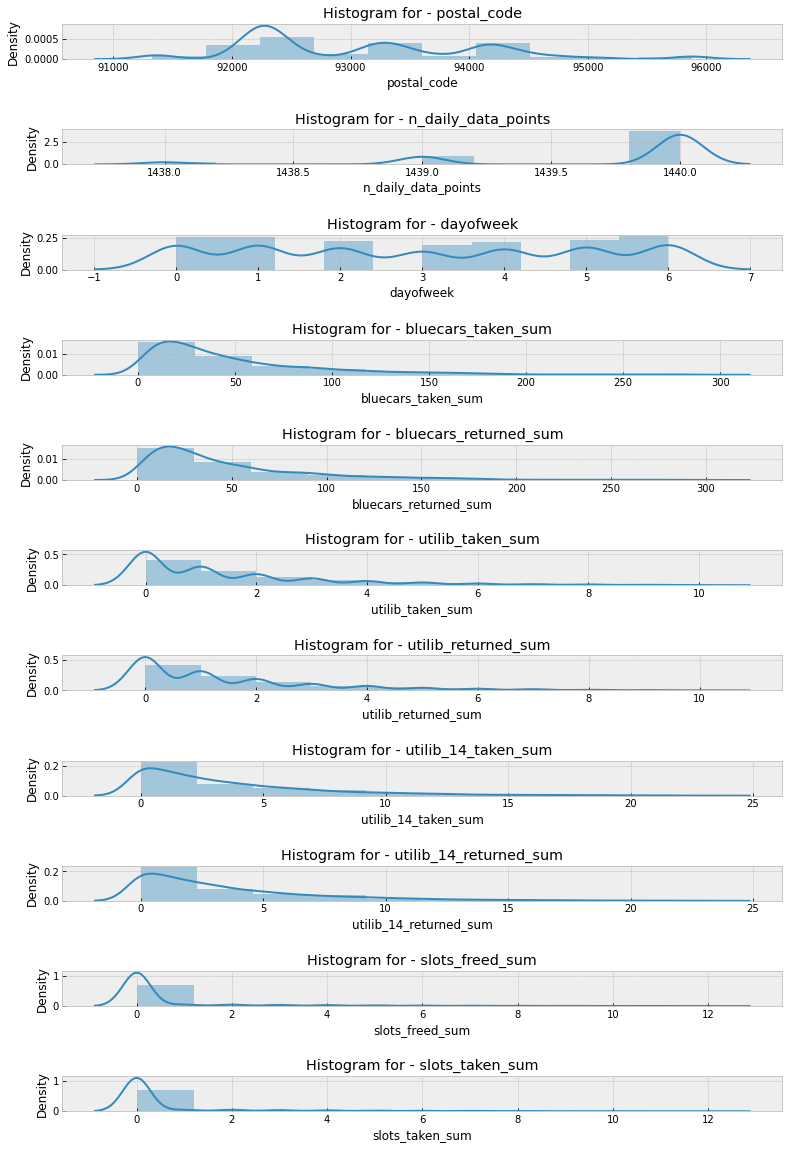

In [46]:
numeric_columns = autolib.drop(['date','day_type'],1)

fig,ax = plt.subplots(len(numeric_columns.columns),figsize=(10,20))

for i,col_val in enumerate(numeric_columns.columns):
  sns.distplot(autolib_clean[col_val], ax=ax[i], bins=10)
  ax[i].set_title('Histogram for - {}'.format(col_val))
  ax[i].set_xlabel(col_val)

plt.subplots_adjust(left = 1, right= 2,hspace= 2, wspace=2)


## Bivariate Analysis

### Numerical and Numerical

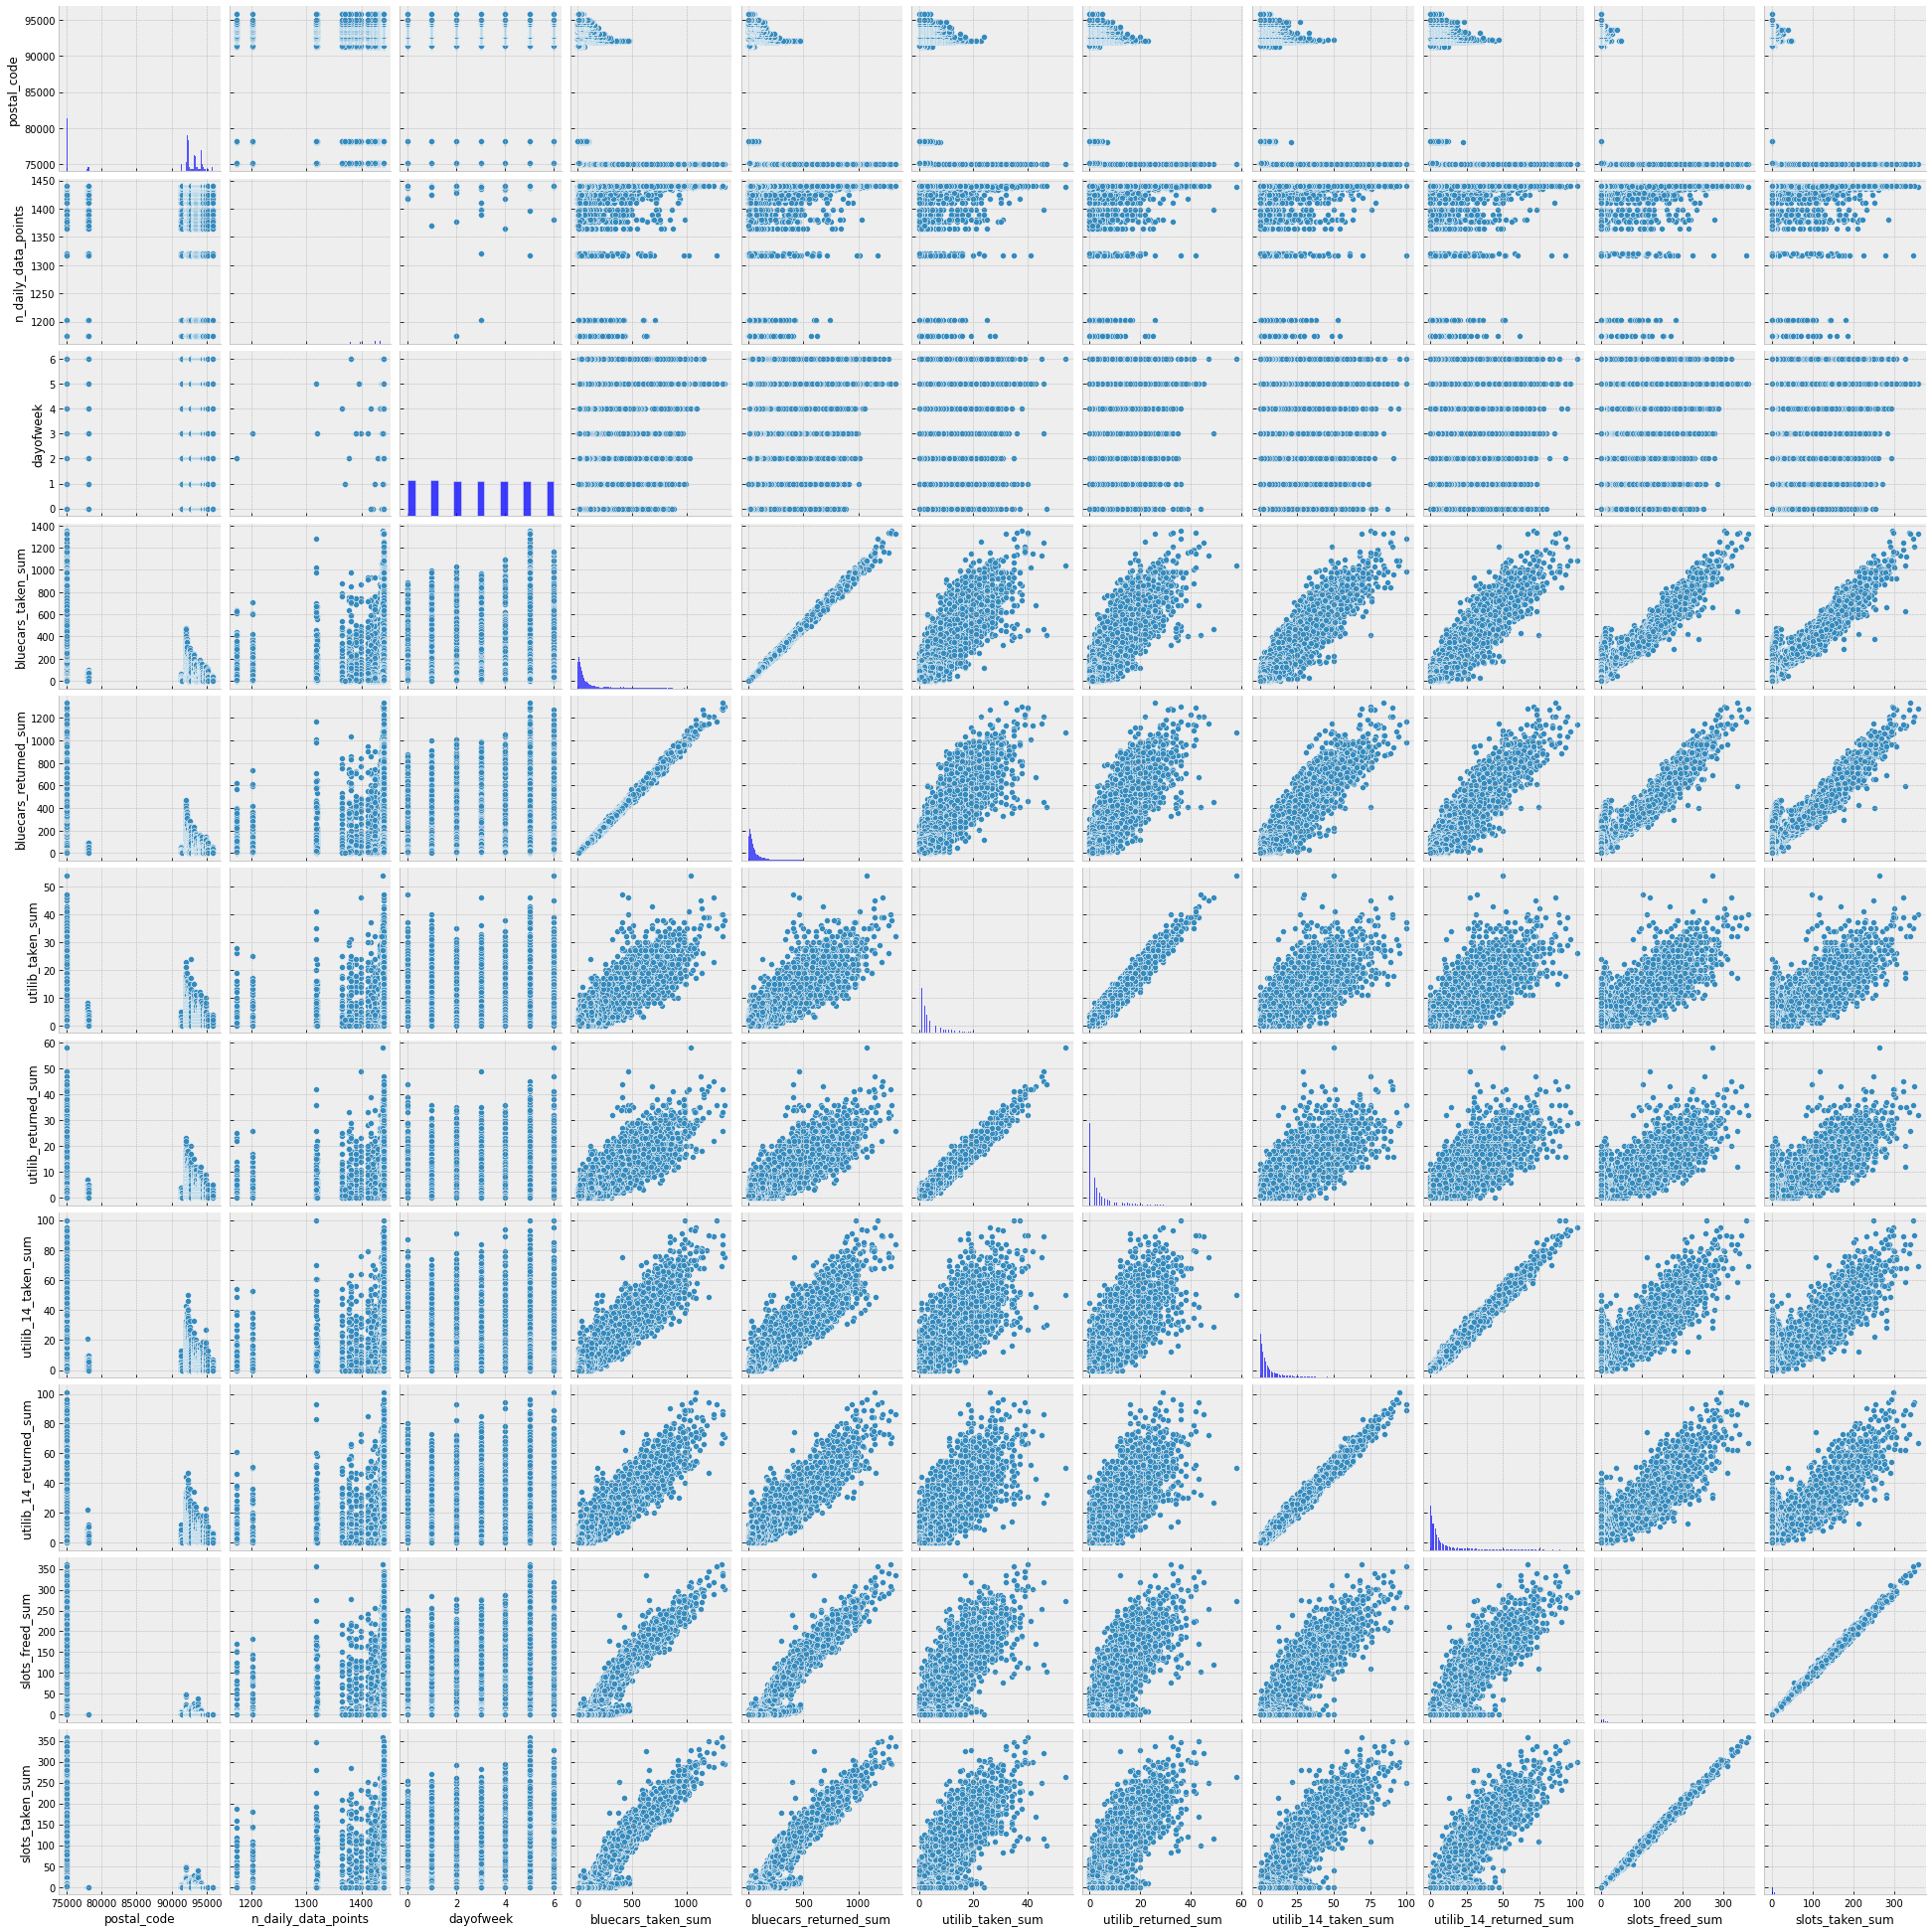

In [21]:
# Scatter Plot
sns.pairplot(numeric_columns)
#plt.title('Respondent Age vs Household Size')

# Shows no correlation
plt.show()

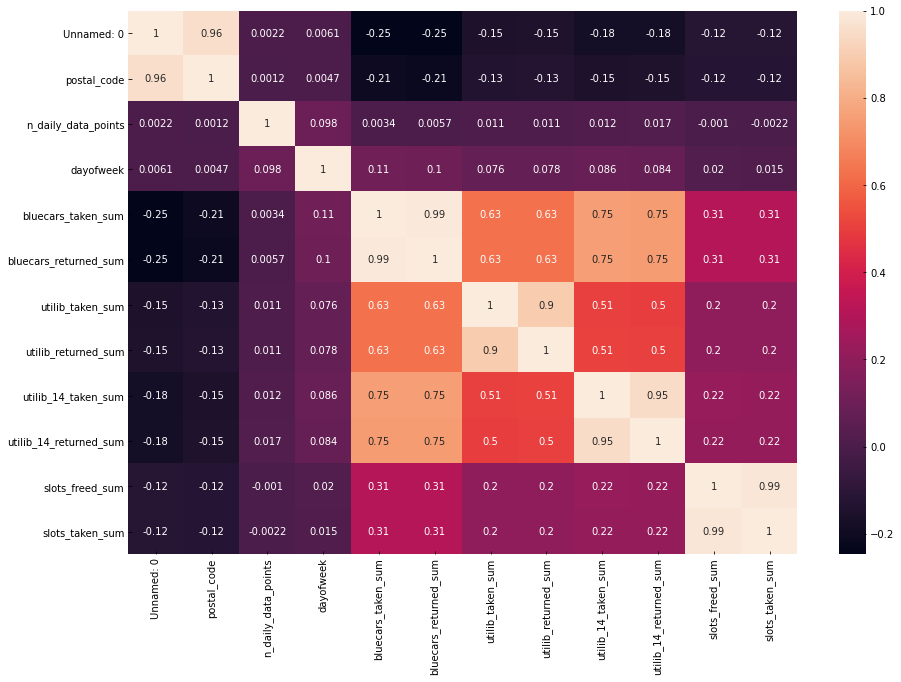

In [47]:
# Correlation in the Numeric Variables
sns.heatmap(autolib_clean.corr(),annot=True)
plt.show()

Z_test

## Hypothesis Testing

H0 : The mean of Blue Cars taken on weekdays is equal to the mean of Utilib Cars taken on weekdays

Ha: The mean of Blue Cars taken on weekdays is different to the mean of Utilib Cars taken on weekdays

Select Sample

In [48]:
# Systemic Random Sampling

def sys_sample(df,r,n):
  k = df.shape[0] // n
  index = [None]* n
  a = r
  index[0] = a

  for i in np.arange(1,n):
    a = a + k
    if a > df.shape[0]:
      a = a - df.shape[0]

    index[i] = a
  return(df.iloc[index])

autolib_sample = sys_sample(autolib_clean[autolib_clean['day_type'] == 'weekday'], r=5, n=200)
autolib_sample.head()

,Unnamed: 0,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
6,3907,91330,1/9/2018,1439,1,weekday,3,9,0,0,1,1,2,3
56,3966,91330,3/12/2018,1440,0,weekday,5,6,0,0,0,0,0,0
105,4026,91330,5/22/2018,1438,1,weekday,1,9,0,0,0,1,4,6
154,4084,91370,1/30/2018,1440,1,weekday,16,15,0,0,0,1,0,0
201,4138,91370,3/28/2018,1440,2,weekday,7,13,0,0,3,1,0,0


Is Data Normally Distributed

In [49]:
from scipy.stats import shapiro 

# testing for normality for Bluecars Taken 
stat, p = shapiro(autolib_sample['bluecars_taken_sum'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.823, p=0.000
Sample does not look Gaussian


In [50]:
# testing for normality for Utilib Cars Taken

stat, p = shapiro(autolib_sample['utilib_taken_sum'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpreting
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian')
else:
	print('Sample does not look Gaussian')

Statistics=0.744, p=0.000
Sample does not look Gaussian


Perform a T-test

In [51]:
from scipy.stats import ttest_ind
ttest,pval = ttest_ind(autolib_sample['bluecars_taken_sum'],autolib_sample['utilib_taken_sum'])

print("This is our p-value", pval)
print("This is value of the ttest", ttest)
# To determine i
if pval < 0.05:
  print("We reject the Null Hypothesis")
else:
  print("We accept the Null Hypothesis")

This is our p-value 1.057625781313243e-37
This is value of the ttest 14.294337054559918
We reject the Null Hypothesis


Point Estimation

In [53]:
# Population Mean for BlueCars
population = autolib_clean[autolib_clean['day_type'] == 'weekday']
population_mean = population['bluecars_taken_sum'].mean()

# The sample mean
sample_mean = autolib_sample['bluecars_taken_sum'].mean()

#point estimator
population_mean - sample_mean


-2.2694428152492634

In [54]:
# Population Mean for Utilib
population_mean_ut = population['utilib_taken_sum'].mean()

# The sample mean
sample_mean_ut = autolib_sample['utilib_taken_sum'].mean()

#point estimator
population_mean_ut - sample_mean_ut

0.10766862170087976

Confidence Level

In [55]:
# Confidence level for Blue Cars

#sample size
sample_size = len(autolib_sample['bluecars_taken_sum'])
sample_size

#standard error
std_error = autolib_sample['bluecars_taken_sum'].std()/np.sqrt(sample_size)
std_error

#Calculating a confidence interval 
import scipy.stats
from scipy.stats import norm
norm.interval(0.95, loc=sample_mean, scale=std_error)

# We can be 95% certain that the population mean data is between -4.69 and 8.08

(41.45266097434814, 54.207339025651855)

In [56]:
# Confidence level for Utilib Cars

#sample size
sample_size_ut = len(autolib_sample['utilib_taken_sum'])
sample_size_ut

#standard error
std_error_ut = autolib_sample['utilib_taken_sum'].std()/np.sqrt(sample_size_ut)
std_error_ut

#Calculating a confidence interval 
import scipy.stats
from scipy.stats import norm
norm.interval(0.95, loc=sample_mean, scale=std_error_ut)

# We can be 95% certain that the population mean data is between 1.42 and 1.96

(47.586015130681815, 48.07398486931818)

## Conclusion

We reject our Null Hypothesis of the mean Blue Cars taken on weekdays is equal to Utilib Cars taken on weekdays because the p-value(p=1.057625781313243e-37) is less than our significance level 0.05